# Grover Advanced (Satisfiability Problem)

In [1]:
# initialization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

# import algorithms from Qiskit
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit.compiler import transpile
from qiskit.utils import QuantumInstance

In [26]:
# this indicates that the input is CNF with five variables and seven clauses
# A AND B
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 2 2
1 0
2 0
'''

with open("3sat_simple_and.dimacs", "w") as text_file:
    text_file.write(input_3sat)
    

In [27]:
# A OR B
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 2 1
1 2 0
'''
with open("3sat_simple_or.dimacs", "w") as text_file:
    text_file.write(input_3sat)
    

In [37]:

oracle = PhaseOracle.from_dimacs_file("3sat_simple_or.dimacs")

backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
problem = AmplificationProblem(oracle=oracle)

# Use Grover's algorithm to solve the problem
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)

# we're interested in the top measurement = result that has the highest 
# probability to be chosen.
result.top_measurement

# Interpretation of the result (bit string in right to left order, EDCBA): 
# we should invite Alice, Bob, Charlie (1), 
# we should not invite Dave and Eve (0).

'10'

{   'assignment': '10',
    'circuit_results': [   {'00': 1024},
                           {'00': 1024},
                           {'00': 1024},
                           {'00': 269, '01': 265, '10': 252, '11': 238},
                           {'00': 262, '01': 237, '10': 266, '11': 259}],
    'iterations': [1, 1, 1, 2, 2],
    'max_probability': 0.259765625,
    'oracle_evaluation': True,
    'top_measurement': '10'}


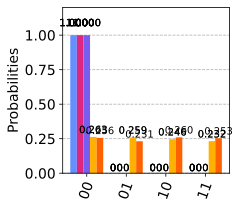

In [45]:
print(result)
plot_histogram(result.circuit_results, figsize=(3, 3))

In [41]:
#https://pysathq.github.io/
from pysat.formula import CNF
formula = CNF(from_file='3sat_simple_or.dimacs')  # reading from file
print("clauses",formula.clauses)

clauses [[1, 2]]


In [43]:
from pysat.solvers import Solver
# Available values: cd, g3, g4, lgl, mcb, mcm, mpl, m22, mc, mgh'
with Solver(name='g3', bootstrap_with=formula.clauses, use_timer=True) as s:
    print("solve",s.solve())
    print("model",s.get_model())

solve True
model [1, -2]
